In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_csv(r"C:\Users\original\Desktop\Student Performance\mission1_data.csv")

In [3]:
data.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Parental Education Level  1000 non-null   object
 2   Lunch Type                1000 non-null   object
 3   Test Preparation Course   574 non-null    object
 4   Study Time                1000 non-null   int64 
 5   Absences                  1000 non-null   int64 
 6   Math Score                1000 non-null   int64 
 7   Reading Score             1000 non-null   int64 
 8   Writing Score             1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
data.isnull().sum()

Gender                        0
Parental Education Level      0
Lunch Type                    0
Test Preparation Course     426
Study Time                    0
Absences                      0
Math Score                    0
Reading Score                 0
Writing Score                 0
dtype: int64

In [6]:
data['Test Preparation Course']=data['Test Preparation Course'].fillna("Not Completed")

In [7]:
data.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,Not Completed,10,7,88,94,72
1,Male,High School,Standard,Not Completed,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,Not Completed,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,Not Completed,2,0,72,92,99


In [8]:
le={}
encoding_cols=['Gender','Parental Education Level','Lunch Type','Test Preparation Course']
for col in encoding_cols:
  le[col]=LabelEncoder()
  data[col]=le[col].fit_transform(data[col])

In [9]:
data.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,1,2,1,1,10,7,88,94,72
1,1,2,1,1,1,3,67,80,95
2,1,1,0,1,1,6,84,100,76
3,1,0,0,0,1,1,60,92,64
4,0,0,0,1,2,0,72,92,99


In [10]:
scale_cols=['Study Time','Absences']
scaler=MinMaxScaler()
data[scale_cols]=scaler.fit_transform(data[scale_cols])

In [11]:
data.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,1,2,1,1,1.000000,0.7,88,94,72
1,1,2,1,1,0.000000,0.3,67,80,95
2,1,1,0,1,0.000000,0.6,84,100,76
3,1,0,0,0,0.000000,0.1,60,92,64
4,0,0,0,1,0.111111,0.0,72,92,99


In [12]:
data.describe()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000
mean,0.568000,1.932000,0.492000,0.426000,0.482556,0.4629,81.154000,78.588000,80.001000
std,0.495602,1.327078,0.500186,0.494741,0.338673,0.3105,11.356992,11.725517,11.488907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,60.000000,60.000000,60.000000
25%,0.000000,1.000000,0.000000,0.000000,0.222222,0.2000,72.000000,69.000000,70.000000
50%,1.000000,2.000000,0.000000,0.000000,0.444444,0.4000,82.000000,77.000000,81.000000
75%,1.000000,3.000000,1.000000,1.000000,0.777778,0.7000,90.000000,89.000000,90.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.0000,100.000000,100.000000,100.000000


In [13]:
data['exam_score']=data['Math Score']+data['Reading Score']+data['Writing Score']

In [14]:
data.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,exam_score
0,1,2,1,1,1.000000,0.7,88,94,72,254
1,1,2,1,1,0.000000,0.3,67,80,95,242
2,1,1,0,1,0.000000,0.6,84,100,76,260
3,1,0,0,0,0.000000,0.1,60,92,64,216
4,0,0,0,1,0.111111,0.0,72,92,99,263


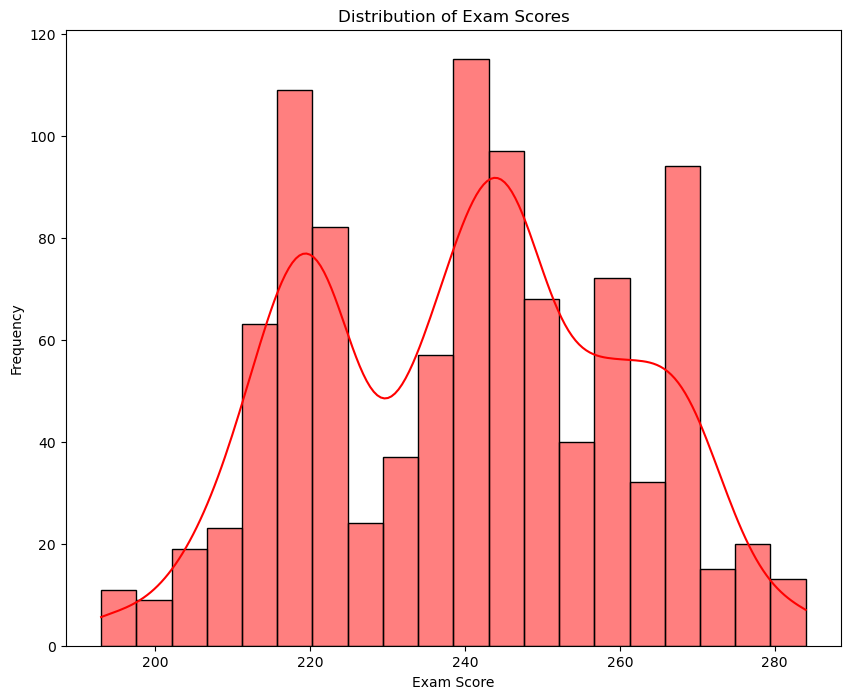

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data['exam_score'], kde=True,bins=20,color='red')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

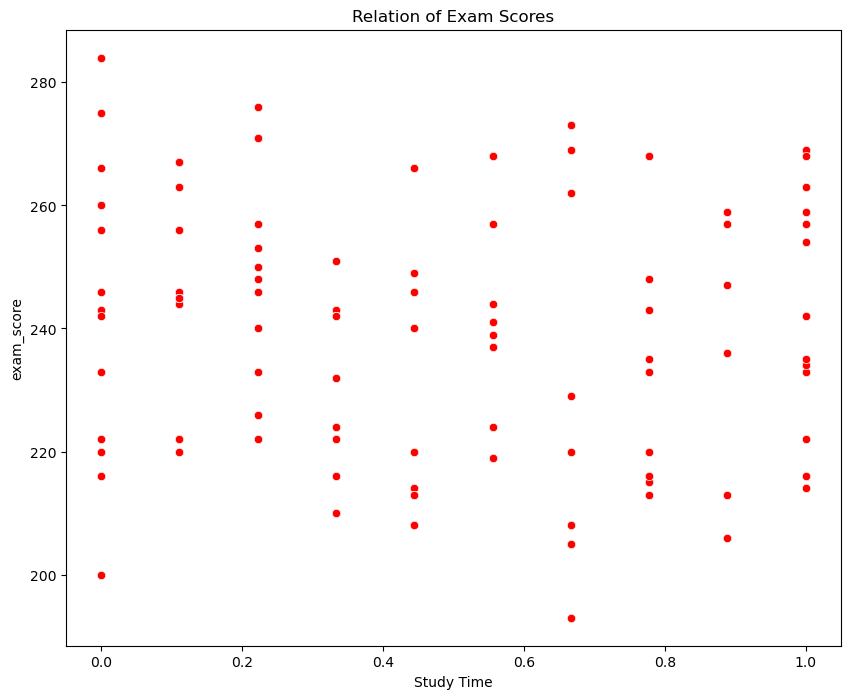

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Study Time',y='exam_score',data=data, color='red')
plt.title('Relation of Exam Scores')
plt.xlabel('Study Time')
plt.ylabel('exam_score')
plt.show()

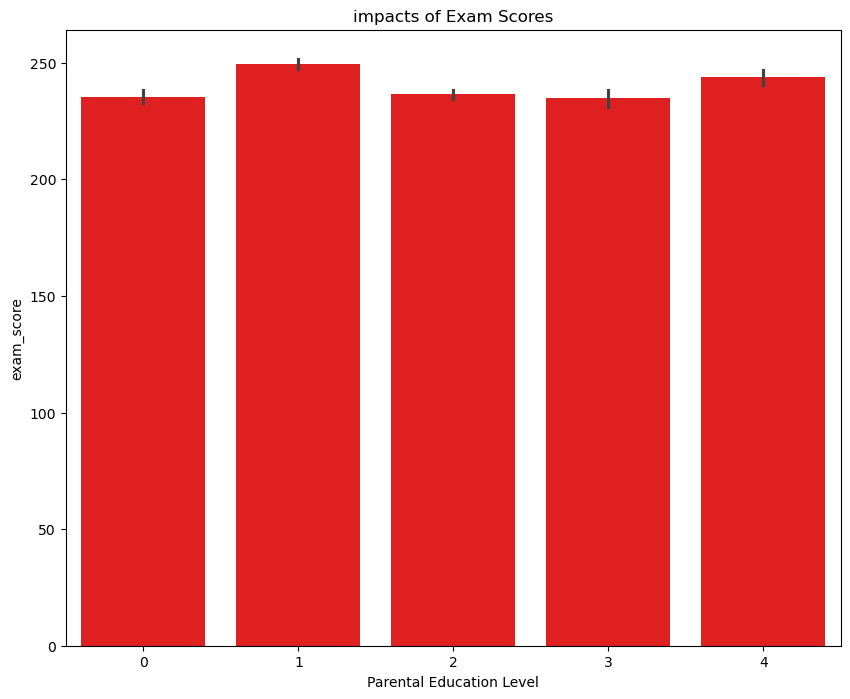

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Parental Education Level',y='exam_score',data=data, color='red')
plt.title('impacts of Exam Scores')
plt.xlabel('Parental Education Level')
plt.ylabel('exam_score')
plt.show()

In [18]:
x=data.drop('exam_score',axis=1)
y=data['exam_score']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
y_predict_rf=rf.predict(x_test)

In [21]:
print("RandomForestRegressor MSE :",mean_squared_error(y_test,y_predict_rf))
print("RandomForestRegressor MAE :",mean_absolute_error(y_test,y_predict_rf))

RandomForestRegressor MSE : 0.1438369999999998
RandomForestRegressor MAE : 0.055599999999999594


In [22]:
print("r2_score RandomForestRegressor  :",r2_score(y_test,y_predict_rf))

r2_score RandomForestRegressor  : 0.9996150092770139


In [23]:
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'max_depth': [10, 20, 30, 40, 50, 60],
    'max_leaf_nodes': [20, 300, 500, 2, 3, 40]
}
random_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=random_params,
    cv=5,  
    n_iter=10,  
    random_state=42  
)
random_model.fit(x_train, y_train)
print(random_model.best_params_)

{'max_leaf_nodes': 500, 'max_depth': 20}


In [24]:
y_predict_random=random_model.best_estimator_.predict(x_test)
print("MSE gridesearch: ",mean_squared_error(y_test,y_predict_random))
print("MAE gridesearch: ",mean_absolute_error(y_test,y_predict_random))
print("r2_score gridesearch: ",r2_score(y_test,y_predict_random))

MSE gridesearch:  0.10626699999999932
MAE gridesearch:  0.04549999999999997
r2_score gridesearch:  0.9997155682532342


In [25]:
data.columns

Index(['Gender', 'Parental Education Level', 'Lunch Type',
       'Test Preparation Course', 'Study Time', 'Absences', 'Math Score',
       'Reading Score', 'Writing Score', 'exam_score'],
      dtype='object')

In [ ]:
import gradio as gr
def predict_exam_score(gender, parental_education_level, lunch_type,test_preparation_course, study_time, absences, math_score,reading_score, writing_score):
  input_data=pd.DataFrame({
      'Gender':[gender],
      'Parental Education Level':[parental_education_level],
      'Lunch Type':[lunch_type],
      'Test Preparation Course':[test_preparation_course],
      'Study Time':[study_time],
      'Absences':[absences],
      'Math Score':[math_score],
      'Reading Score':[reading_score],
      'Writing Score':[writing_score]
  })
  for col in encoding_cols:
    input_data[col]=le[col].transform(input_data[col])
  input_data[scale_cols]=scaler.transform(input_data[scale_cols])
  predict=rf.predict(input_data)
  return f'predicted exam score: {predict[0]:,.2f}'

gr.Interface(
    fn=predict_exam_score,
    inputs=[
        gr.Dropdown(['Female','Male'],label='Gender'),
        gr.Dropdown(['High School','Bachelor','Associate','Master','Some College'],label='Parental Education Level'),
        gr.Dropdown(['Standard','Free/Reduced'],label='Lunch Type'),
        gr.Dropdown(['Completed','Not Completed'],label='Test Preparation Course'),
        gr.Number(label='Study Time'),
        gr.Number(label='Absences'),
        gr.Number(label='Math Score'),
        gr.Number(label='Reading Score'),
        gr.Number(label='Writing Score'),


    ],
    outputs='text',
    title='Predict Exam Score',
).launch()